In [5]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics as m

In [6]:
file= "C:/Users/psais/OneDrive/Desktop/sowmya/Subjects Sem 2/DataSets/Datasets for Predictive Modelling with Python-20190708T233651Z-001/Datasets for Predictive Modelling with Python/Chapter 7/wine.csv" 
df= pd.read_csv(file,sep=";",header='infer')

In [7]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [8]:
#Each observation represents aseparate sample of wine and has information about the chemical composition of that wine.

In [9]:
#Exploratory Data analysis
len(df)
#1599 observations

1599

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

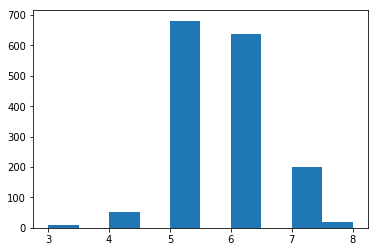

In [10]:
plt.hist(df['quality'])

In [22]:
#More than 75%samples belong to rating 5,6

df.groupby('quality').mean()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [12]:
df.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D object at 0x00000217DBE50940>, <matplotlib.lines.Line2D object at 0x00000217DBE50DD8>], 'caps': [<matplotlib.lines.Line2D object at 0x00000217DBE5C240>, <matplotlib.lines.Line2D object at 0x00000217DBE5C668>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000217DBE507F0>], 'medians': [<matplotlib.lines.Line2D object at 0x00000217DBE5CA90>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000217DBE5CEB8>], 'means': []}


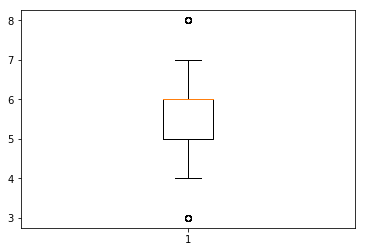

In [13]:
# lotting boxplot tells us about min, max, mean and outliers values
print(plt.boxplot(df['quality'])) 
# the 50percentile and 75percentile coinciding showing that there are very values above rating 6

{'whiskers': [<matplotlib.lines.Line2D object at 0x00000217DC0E2EF0>, <matplotlib.lines.Line2D object at 0x00000217DC0EC3C8>], 'caps': [<matplotlib.lines.Line2D object at 0x00000217DC0EC7F0>, <matplotlib.lines.Line2D object at 0x00000217DC0ECC18>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000217DC0E2DA0>], 'medians': [<matplotlib.lines.Line2D object at 0x00000217DC0F5080>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000217DC0F54A8>], 'means': []}


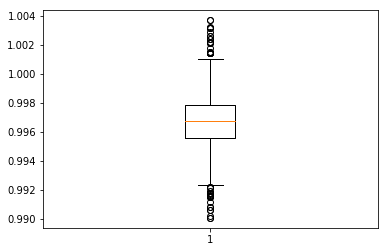

In [14]:
print(plt.boxplot(df['density']))

{'whiskers': [<matplotlib.lines.Line2D object at 0x00000217DC14B208>, <matplotlib.lines.Line2D object at 0x00000217DC14B6A0>], 'caps': [<matplotlib.lines.Line2D object at 0x00000217DC14BAC8>, <matplotlib.lines.Line2D object at 0x00000217DC14BEF0>], 'boxes': [<matplotlib.lines.Line2D object at 0x00000217DC14B0B8>], 'medians': [<matplotlib.lines.Line2D object at 0x00000217DC156358>], 'fliers': [<matplotlib.lines.Line2D object at 0x00000217DC156780>], 'means': []}


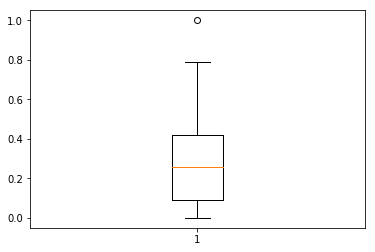

In [15]:
print(plt.boxplot(df['citric acid']))

<function matplotlib.pyplot.show(*args, **kw)>

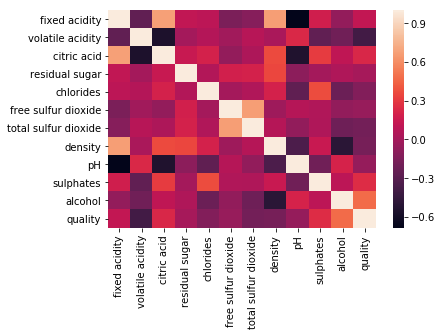

In [21]:
# correlation Matrix
import seaborn as sns

sns.heatmap(df.corr())
plt.show


In [13]:
df.isnull().sum()
# There are no null values in any columns.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
# Normalising is key preprocessing step as in clustering differently scaled variables impact the distances

In [15]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.0,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.0,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4


In [16]:
#USing wards linkage and we want to create 6 clusters and fit the normalised data
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df_norm)

In [17]:
md=pd.Series(ward.labels_)

Text(0,0.5,'Frequency')

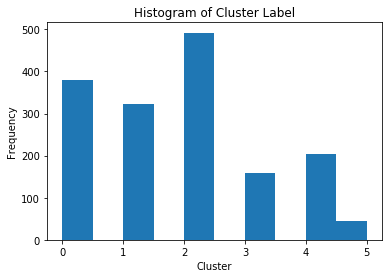

In [18]:
# distribution of the observations in the 6 clusters 
#Samples are more or less uniformly distributed across clusters
plt.hist(md)
plt.title('Histogram of Cluster Label')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

In [47]:
df_norm['clust']=md
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2


In [53]:
df_norm[df_norm['clust']==1].mean()

In [22]:
#Calculating intra cluster distances . It is good to have tight clusters with high intra cluster distance

In [35]:
m.silhouette_score(df_norm,ward.labels_)

0.15386491309363642

In [28]:
# The silhouette_score range -1 to 1 . the above score shows that cluster has more affinitiny to other clusters than itslef.
# Reclustering with 4 cluster size

In [42]:
ward_new = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(df_norm)

In [43]:
md1=pd.Series(ward_new.labels_)

Text(0,0.5,'Frequency')

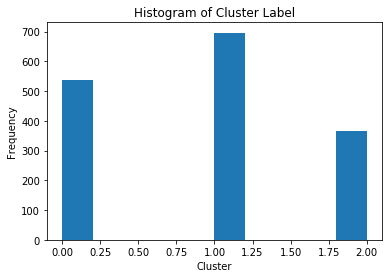

In [44]:
plt.hist(md1)
plt.title('Histogram of Cluster Label')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

In [45]:
m.silhouette_score(df_norm,ward_new.labels_)

0.1768047417165808

In [ ]:
#The low value of .1768 indicate the clusters are close or overlapping